# Create a Geometric Transformation for Rotation

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

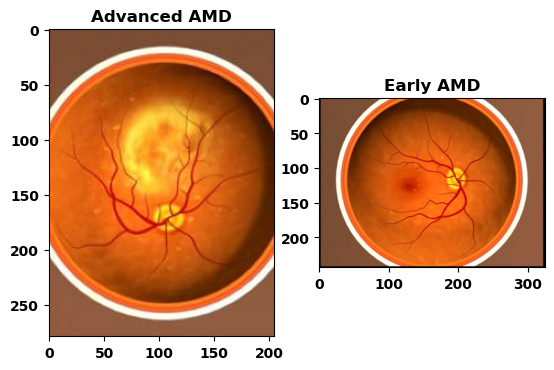

In [2]:
early_AMD = cv2.imread("./images/earlyAMD.jpg")
early_AMD = cv2.cvtColor(early_AMD, cv2.COLOR_BGR2RGB)
advanced_AMD = cv2.imread("./images/advancedAMD.jpg")
advanced_AMD = cv2.cvtColor(advanced_AMD, cv2.COLOR_BGR2RGB)
advanced_AMD = cv2.rotate(advanced_AMD, cv2.ROTATE_90_CLOCKWISE)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(advanced_AMD)
axs[0].set_title('Advanced AMD')
axs[1].imshow(early_AMD)
axs[1].set_title('Early AMD')
plt.show()

The eye scan of advanced AMD has been rotated 90° clockwise. We can use [rotate()](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga4ad01c0978b0ce64baa246811deeac24) to rotate images.

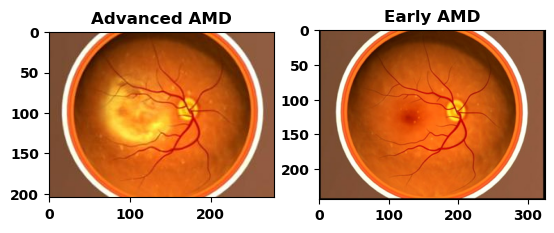

In [3]:
advanced_AMD_rotate = cv2.rotate(advanced_AMD, cv2.ROTATE_90_COUNTERCLOCKWISE);

fig, axs = plt.subplots(1, 2)
axs[0].imshow(advanced_AMD_rotate)
axs[0].set_title('Advanced AMD')
axs[1].imshow(early_AMD)
axs[1].set_title('Early AMD')
plt.show()

The advanced AMD is slightly zoomed out compared to the early AMD image. We can use [resize()](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) to change the size of an image.

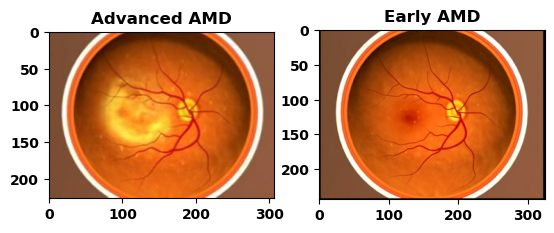

In [4]:
advanced_AMD_rescale = cv2.resize(advanced_AMD_rotate, (0, 0), fx=1.1, fy=1.1)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(advanced_AMD_rescale)
axs[0].set_title('Advanced AMD')
axs[1].imshow(early_AMD)
axs[1].set_title('Early AMD')
plt.show()

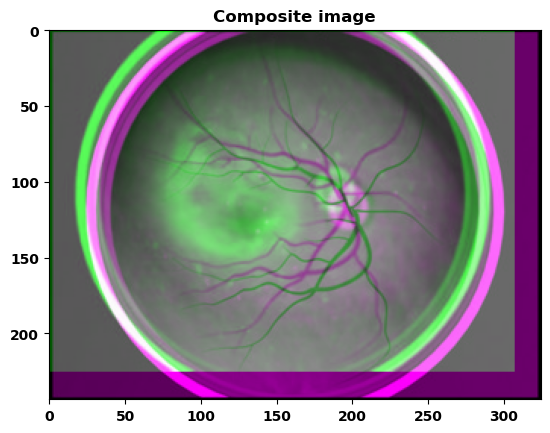

In [5]:
advanced_AMD_rescale_gray = cv2.cvtColor(advanced_AMD_rescale, cv2.COLOR_RGB2GRAY)
early_AMD_gray = cv2.cvtColor(early_AMD, cv2.COLOR_RGB2GRAY)
stacked_AMD = np.dstack((early_AMD_gray,
                        np.pad(advanced_AMD_rescale_gray, pad_width=((0, early_AMD.shape[0] - advanced_AMD_rescale.shape[0]), (0, early_AMD.shape[1] - advanced_AMD_rescale.shape[1])), mode='constant', constant_values=0),
                        early_AMD_gray))

plt.imshow(stacked_AMD)
plt.title("Composite image")
plt.show()

We can see in the overlay that the advanced AMD scan still needs to be translated. We can use [warpAffine()](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983) to translate an image.

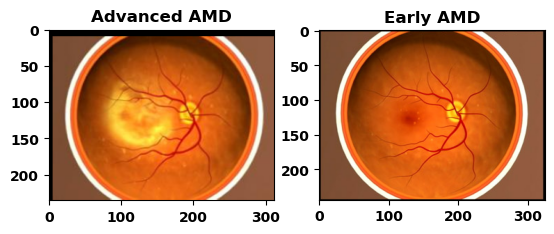

In [6]:
translate_x = 5
translate_y = 10
advanced_AMD_translate = cv2.warpAffine(advanced_AMD_rescale, 
                                        np.float32([[1, 0, translate_x], [0, 1, translate_y]]), 
                                        (advanced_AMD_rescale.shape[1] + translate_x, advanced_AMD_rescale.shape[0] + translate_y))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(advanced_AMD_translate)
axs[0].set_title('Advanced AMD')
axs[1].imshow(early_AMD)
axs[1].set_title('Early AMD')
plt.show()

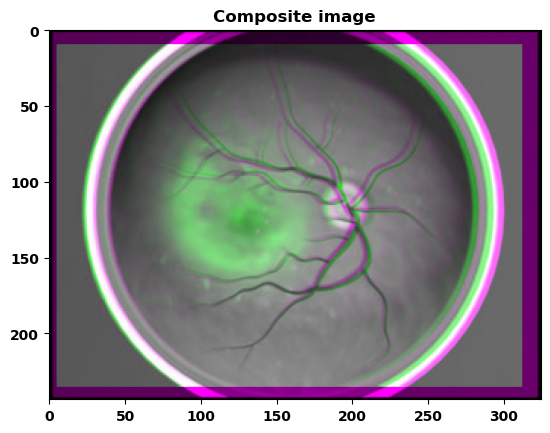

In [7]:
advanced_AMD_translate_gray = cv2.cvtColor(advanced_AMD_translate, cv2.COLOR_RGB2GRAY)

stacked_AMD = np.dstack((early_AMD_gray,
                        np.pad(advanced_AMD_translate_gray, pad_width=((0, early_AMD.shape[0] - advanced_AMD_translate.shape[0]), (0, early_AMD.shape[1] - advanced_AMD_translate.shape[1])), mode='constant', constant_values=0),
                        early_AMD_gray))

plt.imshow(stacked_AMD)
plt.title("Composite image")
plt.show()